In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import geopandas as gpd
import folium

In [5]:
# 따릉이 정류소 데이터
station = pd.read_csv('station(21.01.31).csv', encoding = 'cp949')

# 따릉이 이용 데이터
# colmun : [자전거번호, start_time, 대여 대여소번호, 대여 대여소명, 대여거치대, end_time,반납대여소번호,반납대여소명, 반납거치대, using_time, distance]
# 필요없는 column 버릴까 생각중
# 801335 개 데이터 
use = np.load('selected_data.npz', allow_pickle = True)
use = use['arr_0']

# 인덱스 없애기
station = station.set_index('station number')

In [14]:
len(use[:,0])

801335

In [9]:
# 화살표 그리기 함수
def follow(start, end):
    sx = station.loc[start, 'longitude']
    sy = station.loc[start, 'latitude']
    ex = station.loc[end, 'longitude'] - sx
    ey = station.loc[end, 'latitude'] - sy

    return sx, sy, ex, ey

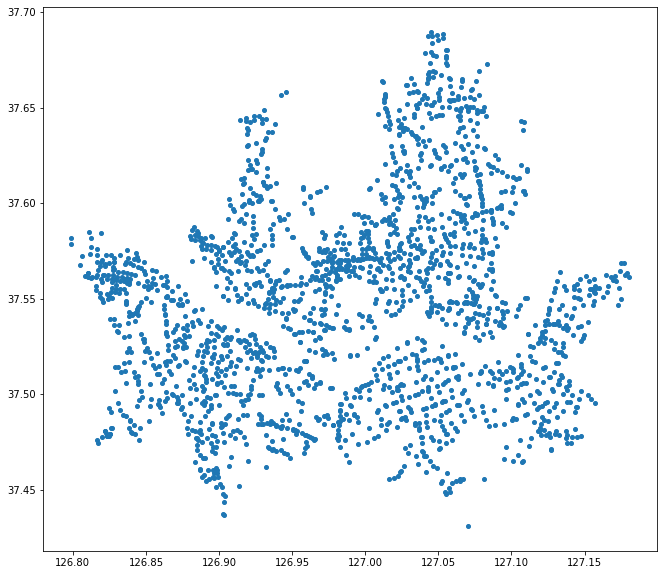

In [7]:
# plt 정류소 단순 위치
plt.figure(figsize = (11, 10))
plt.plot(station.iloc[:, 4], station.iloc[:, 3], 'o', markersize = 4)

In [15]:
# 여러개 움직임 띄우기.
plt.figure(figsize = (11, 10))
plt.plot(station.iloc[:, 4], station.iloc[:, 3], 'o', markersize = 2)

for start, end in zip(use[:30000, 2], use[:30000, 6]):
    x1, y1, x2, y2 = follow(start, end)

    plt.arrow(x1, y1, x2, y2, color = 'r', width = 0.0001,\
              head_width = 0.002, length_includes_head = True, alpha = 0.1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().